In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
df = pd.read_csv('train.csv')
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

<Axes: >

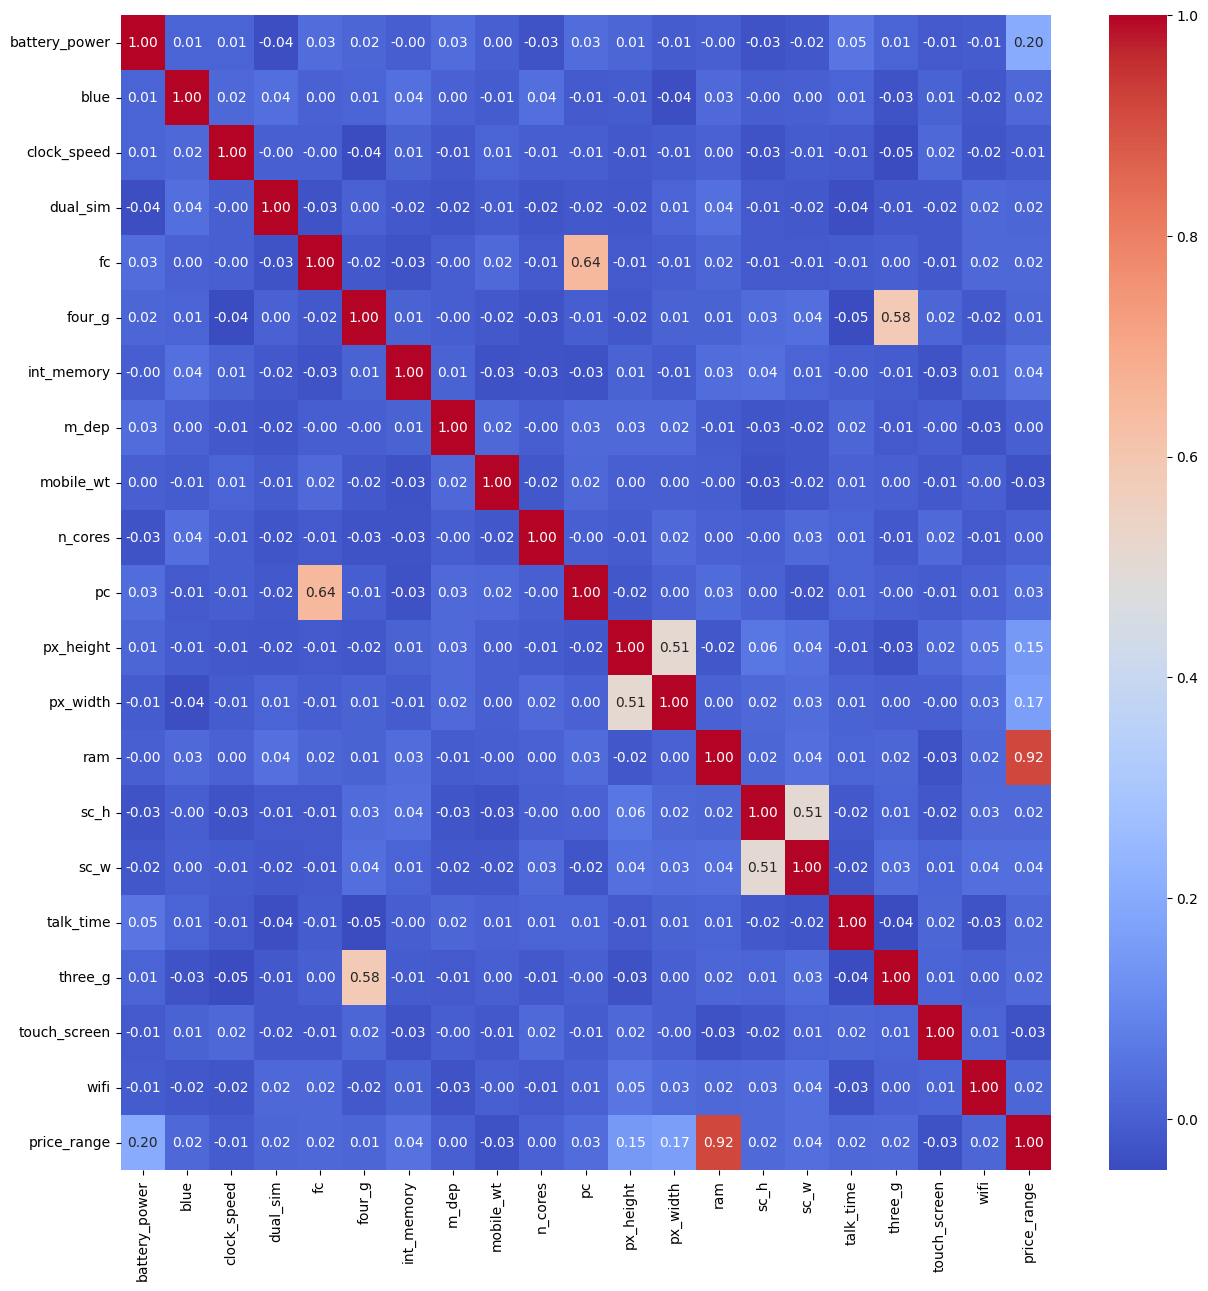

In [8]:
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')

In [11]:
df["price_range"].value_counts()

price_range
1    500
2    500
3    500
0    500
Name: count, dtype: int64

In [12]:
X = df.drop('price_range', axis=1)
y = df['price_range']

In [13]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
models = {
    'Random Forest': RandomForestClassifier(n_estimators=300),
    'SVC': SVC(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'XGBoost': XGBClassifier(n_estimators=300, eval_metric='mlogloss')  # mlogloss for multi-class classification
}

In [19]:
for name, model in models.items():
    pipline = Pipeline([('scaler', StandardScaler()),
                        ('model', model)])
    
    pipline.fit(x_train, y_train)
    y_pred = pipline.predict(x_test)

    print(f"Model: {name}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print("*" * 60)

Model: Random Forest
Accuracy: 0.8925
[[100   5   0   0]
 [  6  79   6   0]
 [  0   6  79   7]
 [  0   0  13  99]]
              precision    recall  f1-score   support

           0       0.94      0.95      0.95       105
           1       0.88      0.87      0.87        91
           2       0.81      0.86      0.83        92
           3       0.93      0.88      0.91       112

    accuracy                           0.89       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.89      0.89      0.89       400

************************************************************
Model: SVC
Accuracy: 0.8925
[[ 98   7   0   0]
 [  5  81   5   0]
 [  0  13  75   4]
 [  0   0   9 103]]
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       105
           1       0.80      0.89      0.84        91
           2       0.84      0.82      0.83        92
           3       0.96      0.92      0.94       112

    accuracy